In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest 

from sklearn.preprocessing import StandardScaler


In [4]:
data = pd.read_csv(r"C:\Users\user\Desktop\Github\Bank Churn Prediction\Bank-Churn-Prediction\data\Churn_Modelling.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
id_data = data[['CustomerId', 'Surname', 'RowNumber']]


In [7]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
data_no_ID = data.drop(columns=['CustomerId', 'Surname', 'RowNumber'])

<Axes: xlabel='Exited'>

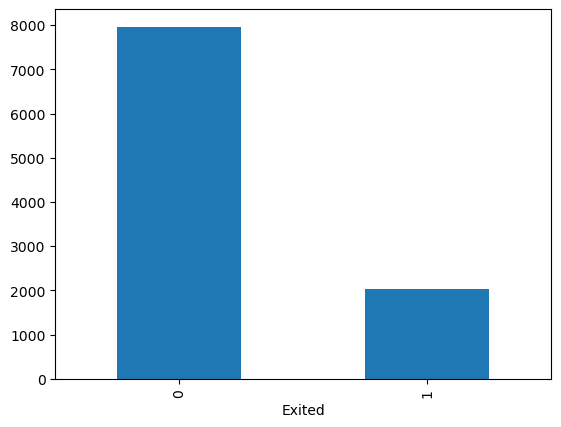

In [9]:
data_no_ID['Exited'].value_counts().plot.bar()

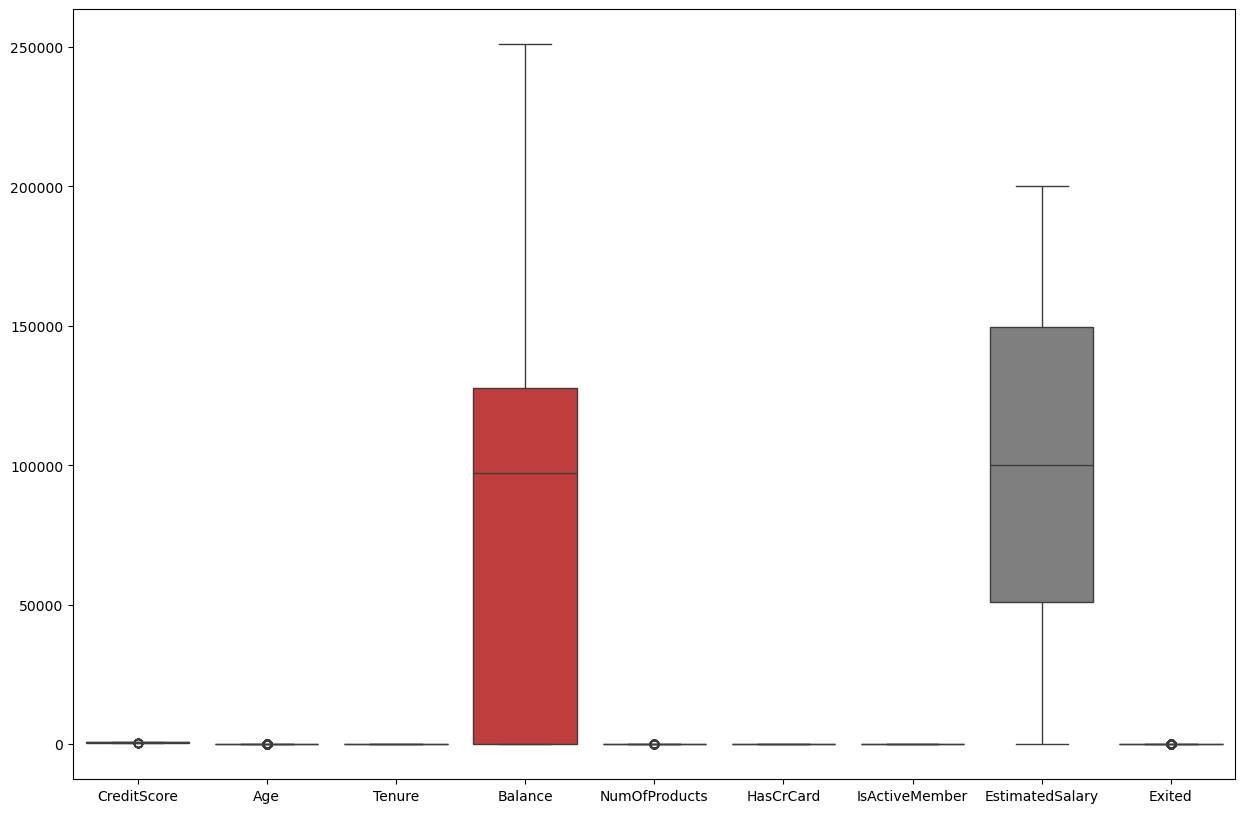

In [10]:
plt.figure(figsize=(15,10))
sns.boxplot(data_no_ID)
plt.show()

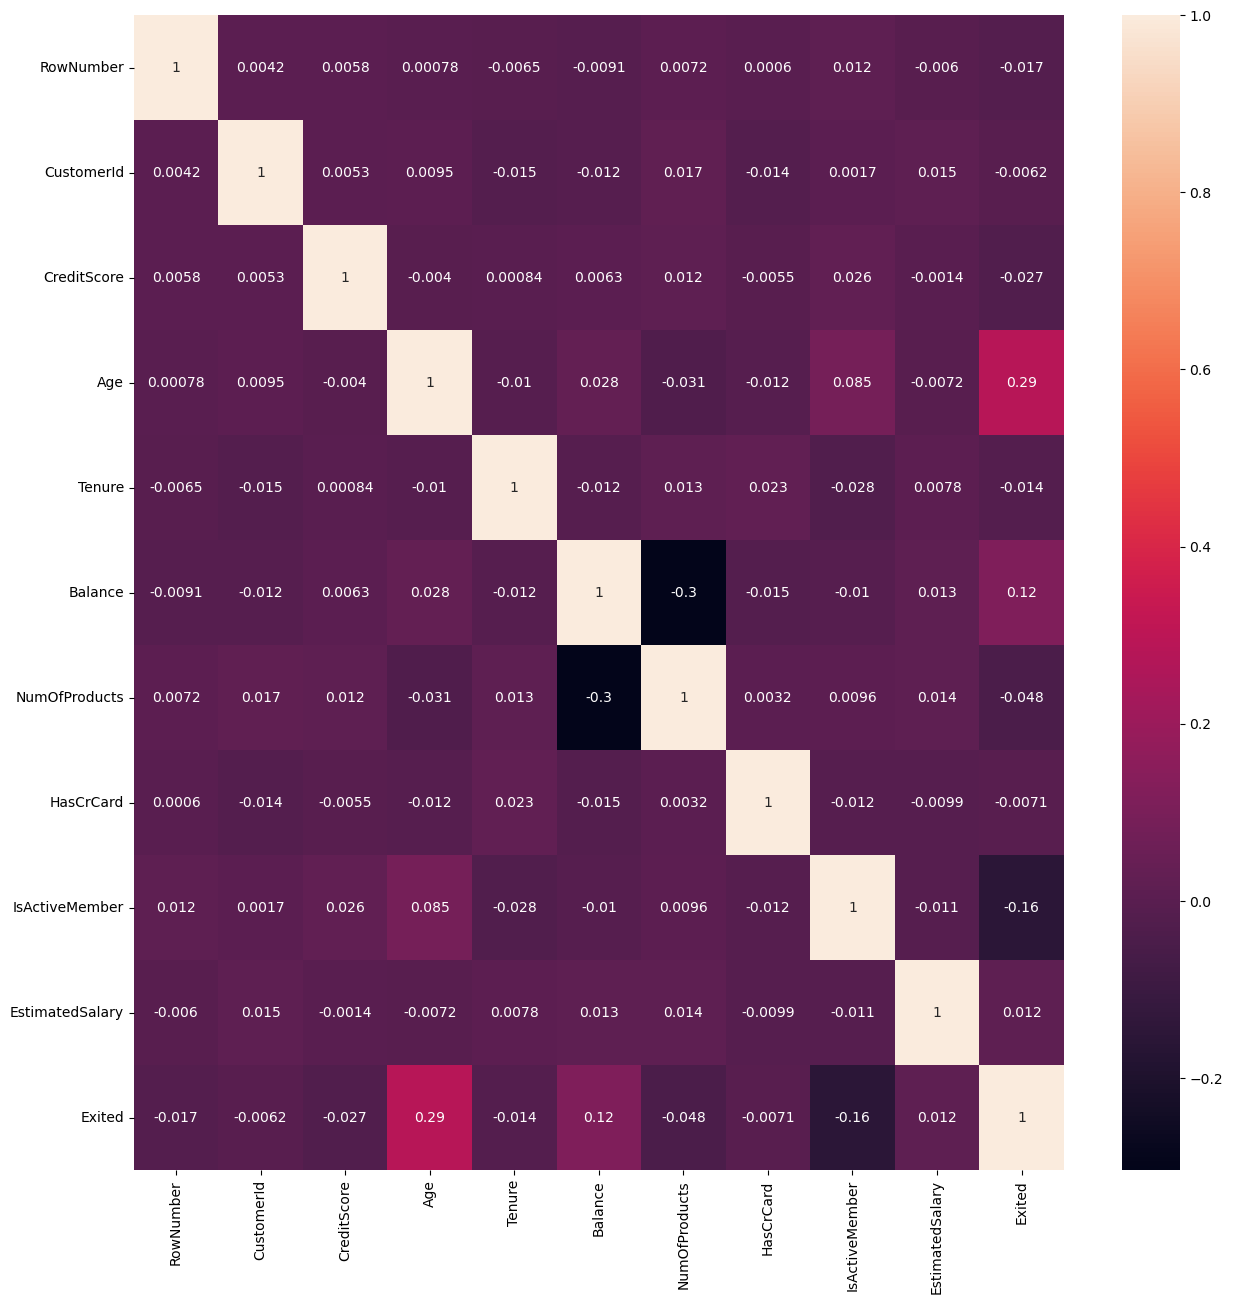

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(data.select_dtypes(exclude='object').corr(), annot=True)
plt.show()

In [12]:

# Drop the target column and set up features and target
X = data_no_ID.drop(columns=['Exited'])
y = data_no_ID['Exited']

# Apply IsolationForest only on numeric features
iforest = IsolationForest(n_estimators=50, contamination=0.05)
pred_forest = iforest.fit_predict(X.select_dtypes(exclude='object'))

# Add anomaly labels to the original dataframe
X['anomaly_label'] = pred_forest

# Optionally, check the distribution of anomaly labels
print(X['anomaly_label'].value_counts())

# Filter out outliers and drop the anomaly label column
X_out = X[X['anomaly_label'] != -1].drop(columns='anomaly_label')

# Align the target variable with the filtered indices
y_out = y.loc[X_out.index]

# Concatenate the filtered features and target
data_out = pd.concat([X_out, y_out], axis=1)


c:\Users\user\miniconda3\envs\hospitality_env\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


anomaly_label
 1    9500
-1     500
Name: count, dtype: int64


In [13]:
data_out.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:

# Specify the target column name
target = "Exited"

# Exclude the target column from the features
features = data_out.drop(columns=[target])

# Identify numeric and object columns in the features DataFrame
numeric_cols = features.select_dtypes(include=['int64', 'float64']).columns
object_cols = features.select_dtypes(include=['object']).columns

# Scale the numeric columns
scaler = StandardScaler()
features_scaled_numeric = pd.DataFrame(scaler.fit_transform(features[numeric_cols]),
                                       columns=numeric_cols,
                                       index=features.index)

# Combine scaled numeric columns with the object columns
data_out_final = pd.concat([features_scaled_numeric, features[object_cols]], axis=1)

# Add the target column back into the cleaned DataFrame
data_out_final[target] = data_out[target]




In [15]:
# Specify your target column

features = data_out_final.drop(columns=[target])
target_data = data_out_final[target]
features_encoded = pd.get_dummies(features, 
                                  columns=features.select_dtypes(include=['object']).columns)

# Combine the encoded features with the target
data_out_final_encoded = pd.concat([features_encoded, target_data], axis=1)


In [16]:
final_data = pd.concat([id_data.loc[data_out_final_encoded.index], data_out_final_encoded], axis=1)


In [17]:
final_data.head()

,CustomerId,Surname,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,15634602,Hargrave,1,-0.339520,0.346630,-1.063441,-1.236091,-0.928777,0.612387,0.970948,0.034049,True,False,False,True,False,1
1,15647311,Hill,2,-0.457202,0.245875,-1.414131,0.124127,-0.928777,-1.632954,0.970948,0.231056,False,False,True,True,False,0
2,15619304,Onio,3,-1.591230,0.346630,1.040701,1.355235,2.722530,0.612387,-1.029921,0.255502,True,False,False,True,False,1
3,15701354,Boni,4,0.516350,0.044364,-1.414131,-1.236091,0.896876,-1.632954,-1.029921,-0.098341,True,False,False,True,False,0
4,15737888,Mitchell,5,2.131805,0.447385,-1.063441,0.800974,-0.928777,0.612387,0.970948,-0.357806,False,False,True,True,False,0


In [19]:
final_data = final_data.drop(columns='RowNumber')

In [21]:
final_data.to_csv(r"C:\Users\user\Desktop\Github\Bank Churn Prediction\Bank-Churn-Prediction\data\cleaned_encoded.csv", index=False)
